## Creation of the dataframe

In [1]:
import pandas as pd
import numpy as np
import string
import glob
import os
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from scipy import linalg as la
from IPython.display import display
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV

In [2]:
# personalized computer settings

hname = os.getlogin()
path = ''

if hname=='paolozinesi': path = '/Users/paolozinesi/Desktop/Magistrale/a.a.2021_2022/Project_LCP_A/stable_MT_vs_CE/'
if hname=='tommaso': path = "/Users/tommaso/Desktop/MagistraleI/TheFormationOfBinaryBlackHoles_data/lab_data/stable_MT_vs_CE/"
if hname=='Nicola': path = "/Users/Nicola/data/TheFormationOfBinaryBlackHoles_data/stable_MT_vs_CE/"
if hname=='ilazza': path = "/home/ilazza/Documenti/UNIPD/TheFormationOfBinaryBlackHoles/stable_MT_vs_CE/"

In [3]:
alpha_values = [0.5, 1, 3, 5]
met_values = [0.02, 0.002, 0.0002, 0.004, 0.0004, 0.006, 0.008, 0.012, 0.0012, 0.016, 0.0016]
columns=['col.0:ID','col.1:m1ZAMS/Msun', 'col.2:m2ZAMS/Msun', 'col.3:m1rem/Msun','col.4:m2rem/Msun',  'col.6:delay_time/Myr', 'col.7:sma/Rsun', 'col.8:ecc', 'col.21:CE']
frame = pd.DataFrame(data=None, columns=columns)

for alpha in alpha_values:
    for met in met_values:
        for name in glob.glob(path+f'A{alpha}/MTCE_BBHs_{met}*'):
            df = pd.read_csv(name, skiprows=2, header=0, sep=' ')
            df = df.loc[:,columns]
            met_array = np.ones((df.shape[0], 1))*met
            alpha_array = np.ones((df.shape[0],1))*alpha
            df['metallicity'] = met_array
            df['alpha'] = alpha_array
            
            frame = pd.concat([frame, df], axis=0, ignore_index=True)
            
frame['colExt1:ratio_m1_m2_ZAMS'] = frame['col.1:m1ZAMS/Msun']/frame['col.2:m2ZAMS/Msun']
frame['colExt2:ratio_m1_m2_rem'] = frame['col.3:m1rem/Msun']/frame['col.4:m2rem/Msun']


In [4]:
frame.head()

,col.0:ID,col.1:m1ZAMS/Msun,col.2:m2ZAMS/Msun,col.3:m1rem/Msun,col.4:m2rem/Msun,col.6:delay_time/Myr,col.7:sma/Rsun,col.8:ecc,col.21:CE,metallicity,alpha,colExt1:ratio_m1_m2_ZAMS,colExt2:ratio_m1_m2_rem
0,0_6942,50.9151,50.8356,4.8001,4.7478,2233.6292,7.9524,0.273150,True,0.02,0.5,1.001564,1.011016
1,0_80347,57.0253,56.9464,5.5849,5.5325,1076.5703,9.0222,0.508320,True,0.02,0.5,1.001386,1.009471
2,0_158611,91.0594,90.7083,8.3787,8.2624,6810.4365,14.9810,0.072798,True,0.02,0.5,1.003871,1.014076
3,0_211410,117.9396,57.6917,19.3984,11.2422,7905.6343,11229.0000,0.999640,False,0.02,0.5,2.044308,1.725499
4,0_213101,40.2965,40.2439,3.1045,3.0769,8703.5479,13.7630,0.705290,True,0.02,0.5,1.001307,1.008970


In [5]:
#Creating the a dataframe with common envelopes and one with mass transfer
frame_true = frame[(frame['col.21:CE'] == True)] 
frame_true = frame_true.reset_index(drop=True)
frame_false = frame[(frame['col.21:CE'] == False)] 
frame_false = frame_false.reset_index(drop=True)

In [6]:
frame_true.head()

,col.0:ID,col.1:m1ZAMS/Msun,col.2:m2ZAMS/Msun,col.3:m1rem/Msun,col.4:m2rem/Msun,col.6:delay_time/Myr,col.7:sma/Rsun,col.8:ecc,col.21:CE,metallicity,alpha,colExt1:ratio_m1_m2_ZAMS,colExt2:ratio_m1_m2_rem
0,0_6942,50.9151,50.8356,4.8001,4.7478,2233.6292,7.9524,0.273150,True,0.02,0.5,1.001564,1.011016
1,0_80347,57.0253,56.9464,5.5849,5.5325,1076.5703,9.0222,0.508320,True,0.02,0.5,1.001386,1.009471
2,0_158611,91.0594,90.7083,8.3787,8.2624,6810.4365,14.9810,0.072798,True,0.02,0.5,1.003871,1.014076
3,0_213101,40.2965,40.2439,3.1045,3.0769,8703.5479,13.7630,0.705290,True,0.02,0.5,1.001307,1.008970
4,0_261642,62.6781,58.8130,7.5024,5.9658,2895.4182,10.4610,0.163210,True,0.02,0.5,1.065718,1.257568


In [7]:
frame_false.head()

,col.0:ID,col.1:m1ZAMS/Msun,col.2:m2ZAMS/Msun,col.3:m1rem/Msun,col.4:m2rem/Msun,col.6:delay_time/Myr,col.7:sma/Rsun,col.8:ecc,col.21:CE,metallicity,alpha,colExt1:ratio_m1_m2_ZAMS,colExt2:ratio_m1_m2_rem
0,0_211410,117.9396,57.6917,19.3984,11.2422,7905.6343,11229.000,0.999640,False,0.020,0.5,2.044308,1.725499
1,1_3370919,76.2366,38.3205,10.0905,8.1532,5914.8696,5378.200,0.999510,False,0.020,0.5,1.989447,1.237612
2,1_3601930,123.0264,39.9761,18.0234,7.6028,9398.3252,3408.700,0.998740,False,0.020,0.5,3.077499,2.370627
3,3_2982857,132.6673,30.7234,20.7397,5.6742,3331.2690,3755.500,0.999260,False,0.020,0.5,4.318119,3.655088
4,0_526,75.1587,33.6683,26.1035,25.6875,12982.4980,41.214,0.009654,False,0.002,0.5,2.232328,1.016195


## ML algorithms

### Full dataset
#### !!!!! Warning: long computational time from now on

In [8]:
# fraction of data for test set
test_fract = 0.01
m_test_full = int(frame.shape[0]*test_fract)
m_train_full = frame.shape[0] - m_test_full
frame_sample_full = frame.sample(frac=1, replace=False, ignore_index=True)
frame_train_full = frame_sample_full.iloc[:-m_test_full]
frame_test_full = frame_sample_full.iloc[-m_test_full:]

# separate dataframes
lbl = {False:'SMT', True:'CE'}
X_train_full = frame_train_full.drop(labels=['col.0:ID','col.21:CE'], axis=1)
Y_train_full = frame_train_full["col.21:CE"].apply(lambda x: lbl[x])
X_test_full = frame_test_full.drop(labels=['col.0:ID','col.21:CE'], axis=1)
Y_test_full = frame_test_full["col.21:CE"].apply(lambda x: lbl[x])

### PCA on the full dataset

In [9]:
# DATA NORMALIZATION
# standardize the input matrix
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_train_full)

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
pd.set_option("chop_threshold", 1e-08)

X_train_full_ = pd.DataFrame(scaler.transform(X_train_full),columns=X_train_full.columns)
print ("\nMean of the training input data:", np.around(X_train_full_.mean(axis=0), 4))
print ("\nStd of the training input data:", np.around(X_train_full_.std(axis=0), 4))

X_test_full_ = pd.DataFrame(scaler.transform(X_test_full),columns=X_test_full.columns) # use the same transformation on test data
# print ("\nMean of the test input data:\n", X_test_full_.mean(axis=0))
# print ("\nStd of the test input data:\n", X_test_full_.std(axis=0))

# PCA
data_PCA = X_train_full_.cov()

# eigenvectors and eigenvalues using covariance matrix
l, V = la.eig(data_PCA)

# sort to have the eigenvalues in descending order
idx = l.argsort()[::-1]
l = np.real_if_close(l[idx])
V = V[:, idx]

np.set_printoptions(precision=3)
print('\nEigenvalues: \n', l)
#print('Eigenvectors:\n', V)

ncomp = 8
variability_PC = np.sum(l[:ncomp])/np.sum(l)
print('\nPercent of the total variability explained by the %.0f principal components: %.5f' %(ncomp, variability_PC))


Mean of the training input data: col.1:m1ZAMS/Msun           0.0
col.2:m2ZAMS/Msun           0.0
col.3:m1rem/Msun            0.0
col.4:m2rem/Msun            0.0
col.6:delay_time/Myr        0.0
col.7:sma/Rsun              0.0
col.8:ecc                   0.0
metallicity                 0.0
alpha                       0.0
colExt1:ratio_m1_m2_ZAMS    0.0
colExt2:ratio_m1_m2_rem     0.0
dtype: float64

Std of the training input data: col.1:m1ZAMS/Msun           1.0
col.2:m2ZAMS/Msun           1.0
col.3:m1rem/Msun            1.0
col.4:m2rem/Msun            1.0
col.6:delay_time/Myr        1.0
col.7:sma/Rsun              1.0
col.8:ecc                   1.0
metallicity                 1.0
alpha                       1.0
colExt1:ratio_m1_m2_ZAMS    1.0
colExt2:ratio_m1_m2_rem     1.0
dtype: float64

Eigenvalues: 
 [4.059 1.712 1.329 1.005 0.94  0.871 0.514 0.452 0.069 0.039 0.011]

Percent of the total variability explained by the 8 principal components: 0.98916


(2419281, 8)
(24437, 8)


,0,1,2,3,4,5,6,7,col.21:CE
0,-0.233484,-0.15491,1.331441,-0.101402,0.068283,0.543586,-0.444611,0.287461,CE
1,0.988021,-0.915638,0.933735,0.144964,-0.417358,0.096167,-0.141906,0.032329,CE
2,0.068802,0.68393,-1.508762,0.000567,-1.046021,0.391781,-0.709757,0.573343,CE
3,3.524577,0.44043,0.511086,-0.024553,0.296054,-0.174044,0.677635,-0.252997,SMT
4,-0.430345,1.329004,-0.365911,-0.306862,-0.367407,1.306361,0.167123,-0.321299,CE


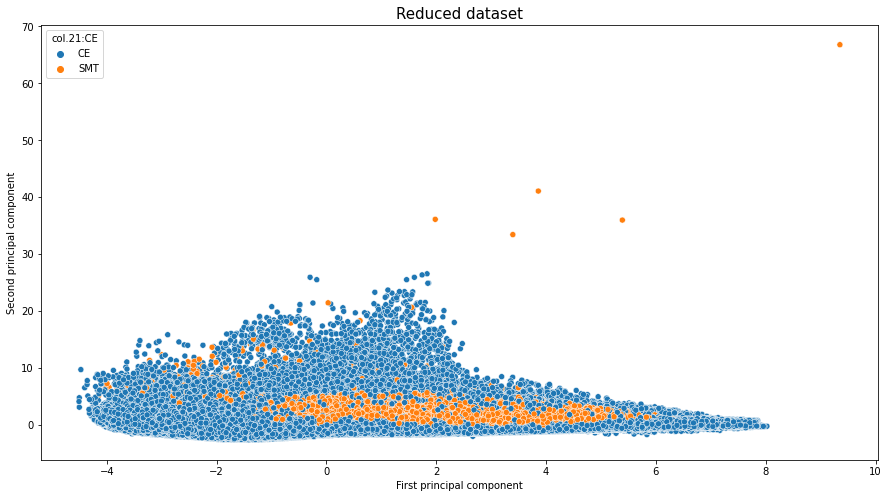

In [10]:
# Data in the PCA basis
data_ = np.dot(X_train_full_, V)

# Reduce the dimensionality of the dataset 
data_reduced = data_[:,:ncomp]

X_train_PCA_full = pd.DataFrame(data_reduced)
X_test_PCA_full = pd.DataFrame(np.dot(X_test_full_, V)[:,:ncomp])
print(X_train_PCA_full.shape)
print(X_test_PCA_full.shape)

df = pd.DataFrame(np.column_stack((X_train_PCA_full, Y_train_full)))
df.rename(columns = {ncomp:'col.21:CE'}, inplace=True)
display(df.head())

plt.figure(figsize=(15, 8))
sns.scatterplot(x=0, y=1, hue='col.21:CE', data=df)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Reduced dataset', fontsize=15)
plt.show()

### Random Forest: Full dataset with smoothing, no normalization of data

In [11]:
best_param = {'max_depth':7, 'min_samples_leaf':1e-04}
smooth_RF_full_clf = RandomForestClassifier(max_depth=best_param['max_depth'], min_samples_leaf=best_param['min_samples_leaf'])
smooth_RF_full_clf.fit(X_train_full, Y_train_full)

train_err = 1 - smooth_RF_full_clf.score(X_train_full, Y_train_full)
print("Training error = %1.5f" % train_err)
test_err = 1 - smooth_RF_full_clf.score(X_test_full, Y_test_full)
print("Test error = %1.5f" % test_err)

# display features importances
display(pd.DataFrame(data=np.array([smooth_RF_full_clf.feature_names_in_, smooth_RF_full_clf.feature_importances_]).T,
                     columns=["feature names", "feature importance"]).sort_values(by='feature importance', ascending=False))

Training error = 0.00858
Test error = 0.00908


,feature names,feature importance
9,colExt1:ratio_m1_m2_ZAMS,0.288308
10,colExt2:ratio_m1_m2_rem,0.148201
5,col.7:sma/Rsun,0.128148
0,col.1:m1ZAMS/Msun,0.121378
2,col.3:m1rem/Msun,0.103377
1,col.2:m2ZAMS/Msun,0.061503
3,col.4:m2rem/Msun,0.059042
6,col.8:ecc,0.038967
4,col.6:delay_time/Myr,0.024144
8,alpha,0.013744


In [12]:
# Export as dot file
#export_graphviz(smooth_RF_full_clf.estimators_[50], out_file='smooth_RF_full.dot', 
#                feature_names = smooth_RF_full_clf.feature_names_in_,
#                class_names = smooth_RF_full_clf.classes_,
#                rounded = True, proportion = False, 
#                precision = 2, filled = True)

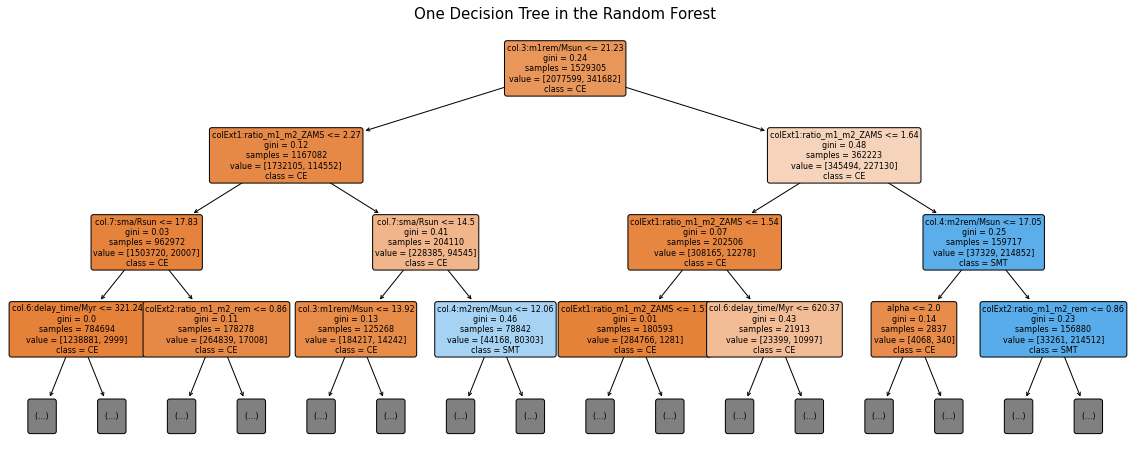

In [13]:
# first 3 layers of tree
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 8))
sklearn.tree.plot_tree(smooth_RF_full_clf.estimators_[50], max_depth=3,
                        feature_names = smooth_RF_full_clf.feature_names_in_,
                        class_names = smooth_RF_full_clf.classes_,
                        rounded = True, proportion = False, 
                        precision = 2, filled = True,
                        fontsize=8, ax=ax)
ax.set_title('One Decision Tree in the Random Forest', fontsize=15)
plt.show()

### Random Forest: Full dataset with smoothing, with PCA

In [14]:
best_param = {'max_depth':7, 'min_samples_leaf':1e-04}
smooth_RF_PCA_full_clf = RandomForestClassifier(max_depth=best_param['max_depth'], min_samples_leaf=best_param['min_samples_leaf'])
smooth_RF_PCA_full_clf.fit(X_train_PCA_full, Y_train_full)

train_err = 1 - smooth_RF_PCA_full_clf.score(X_train_PCA_full, Y_train_full)
print("Training error = %1.3f" % train_err)
test_err = 1 - smooth_RF_PCA_full_clf.score(X_test_PCA_full, Y_test_full)
print("Test error = %1.3f" % test_err)

Training error = 0.021
Test error = 0.021


In [15]:
# Export as dot file
#export_graphviz(smooth_RF_full_clf.estimators_[50], out_file='smooth_RF_PCA_full.dot', 
#                feature_names = smooth_RF_PCA_full_clf.feature_names_in_,
#                class_names = smooth_RF_PCA_full_clf.classes_,
#                rounded = True, proportion = False, 
#                precision = 2, filled = True)

### SVM: full dataset, with normalization of data

In [18]:
SVM_full_clf = sklearn.svm.LinearSVC(dual=False)
SVM_full_clf.fit(X_train_full_, Y_train_full)

train_err = 1 - SVM_full_clf.score(X_train_full_, Y_train_full)
print("Training error = %1.5f" % train_err)
test_err = 1 - SVM_full_clf.score(X_test_full_, Y_test_full)
print("Test error = %1.5f" % test_err)

display(pd.DataFrame(data=np.array([SVM_full_clf.feature_names_in_, np.abs(SVM_full_clf.coef_[0])]).T,
                     columns=["feature names", "feature weights (absolute value)"]).sort_values(by="feature weights (absolute value)", ascending=False))

Training error = 0.022
Test error = 0.022


,feature names,feature weights (absolute value)
2,col.3:m1rem/Msun,5.418234
1,col.2:m2ZAMS/Msun,2.447416
10,colExt2:ratio_m1_m2_rem,1.606786
0,col.1:m1ZAMS/Msun,1.335038
9,colExt1:ratio_m1_m2_ZAMS,0.799721
3,col.4:m2rem/Msun,0.666168
5,col.7:sma/Rsun,0.354365
7,metallicity,0.3374
6,col.8:ecc,0.196257
4,col.6:delay_time/Myr,0.132651


### SVM: full dataset, with PCA

In [19]:
SVM_PCA_full_clf = sklearn.svm.LinearSVC(dual=False)
SVM_PCA_full_clf.fit(X_train_PCA_full, Y_train_full)

train_err = 1 - SVM_PCA_full_clf.score(X_train_PCA_full, Y_train_full)
print("Training error = %1.5f" % train_err)
test_err = 1 - SVM_PCA_full_clf.score(X_test_PCA_full, Y_test_full)
print("Test error = %1.5f" % test_err)

Training error = 0.034
Test error = 0.034
